In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [3]:
df = pd.read_csv('C:/Users/KahindiE/Desktop/data_science/sales.csv')
df.head()

,date,id,category_id,sales,views,price_cost,price_retail
0,2022-02-24,1,3,0,0,0,0
1,2022-02-25,1,3,0,0,0,0
2,2022-02-26,1,3,0,0,0,0
3,2022-02-27,1,3,0,0,0,0
4,2022-02-28,1,3,0,0,0,0


In [7]:
df.loc[[0,1,5],['views','date']]
#df.iloc[[0,1,5],[0,3]]

,views,date
0,0,2022-02-24
1,0,2022-02-25
5,0,2022-03-01


In [32]:
df = df.select_dtypes(include=[np.number])#selecting only numeric columns

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548824 entries, 0 to 2548823
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   id            int64 
 2   category_id   int64 
 3   sales         int64 
 4   views         int64 
 5   price_cost    int64 
 6   price_retail  int64 
dtypes: int64(6), object(1)
memory usage: 136.1+ MB


In [8]:
df.columns

Index(['date', 'id', 'category_id', 'sales', 'views', 'price_cost',
       'price_retail'],
      dtype='object')

In [9]:
df.isnull().sum()

date            0
id              0
category_id     0
sales           0
views           0
price_cost      0
price_retail    0
dtype: int64

In [33]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)#replacing infinite values with NaN


In [35]:
df.dropna(inplace=True)#dropping NaN values
df = df.apply(pd.to_numeric, errors='coerce')#converting non-numeric values to Numerical

In [11]:
df.describe()

,id,category_id,sales,views,price_cost,price_retail
count,2.548824e+06,2.548824e+06,2.548824e+06,2.548824e+06,2.548824e+06,2.548824e+06
mean,1.741500e+03,1.590752e+00,3.706074e-01,3.825130e+01,1.219318e+04,1.768616e+04
std,1.005167e+03,6.505913e-01,5.039799e+00,1.824299e+02,1.858160e+04,2.641387e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.710000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.741500e+03,2.000000e+00,0.000000e+00,8.000000e+00,3.546000e+03,7.582000e+03
75%,2.612000e+03,2.000000e+00,0.000000e+00,3.300000e+01,1.814800e+04,2.580000e+04
max,3.482000e+03,4.000000e+00,1.372000e+03,4.314800e+04,2.925730e+05,7.590770e+05


In [14]:
df['views']

0           0
1           0
2           0
3           0
4           0
           ..
2548819    41
2548820    23
2548821    14
2548822    17
2548823    25
Name: views, Length: 2548824, dtype: int64

In [12]:
df.dtypes


date            object
id               int64
category_id      int64
sales            int64
views            int64
price_cost       int64
price_retail     int64
dtype: object

In [23]:
df['date'] = pd.to_datetime(df['date']) #convert date column to datetime
df_2024 = df[df['date'].dt.year == 2024] #filtering data for year 2024
df_2024.head()

,date,id,category_id,sales,views,price_cost,price_retail
676,2024-01-01,1,3,1,39,1450,1885
677,2024-01-02,1,3,0,89,1450,1885
678,2024-01-03,1,3,0,90,1450,1885
679,2024-01-04,1,3,0,129,1450,1885
680,2024-01-05,1,3,0,81,1450,1885


In [24]:
df.duplicated().sum()

0

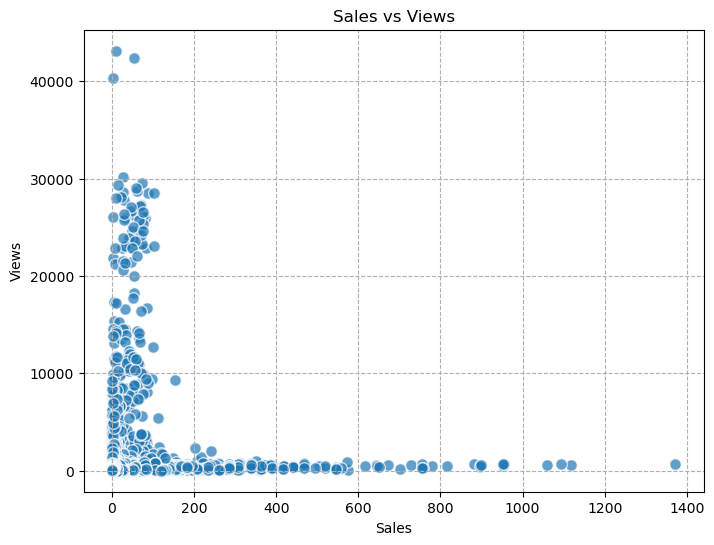

In [25]:
# visualization with 3d scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['sales'], df['views'], alpha=0.7, edgecolors='w', s=70)
plt.title('Sales vs Views')
plt.xlabel('Sales')
plt.ylabel('Views')
plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:
#standardizing the data
scaler = StandardScaler()

In [ ]:
X = df['views']#assigning 'views' column to X
y = df['sales']#assigning 'sales' column to y

In [38]:
df[['views']] = scaler.fit_transform(df[['views']])#standardizing the 'views' column

X = pd.DataFrame(X, columns=['views'])#creating a new dataframe with 'views' column

X = sm.add_constant(X)#adding a constant term to the dataframe

In [39]:
model = sm.OLS(y, X).fit()#fitting the linear regression mode
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                 4.577e+04
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:50:11   Log-Likelihood:            -7.7163e+06
No. Observations:             2548824   AIC:                         1.543e+07
Df Residuals:                 2548822   BIC:                         1.543e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3706      0.003    118.450      0.0

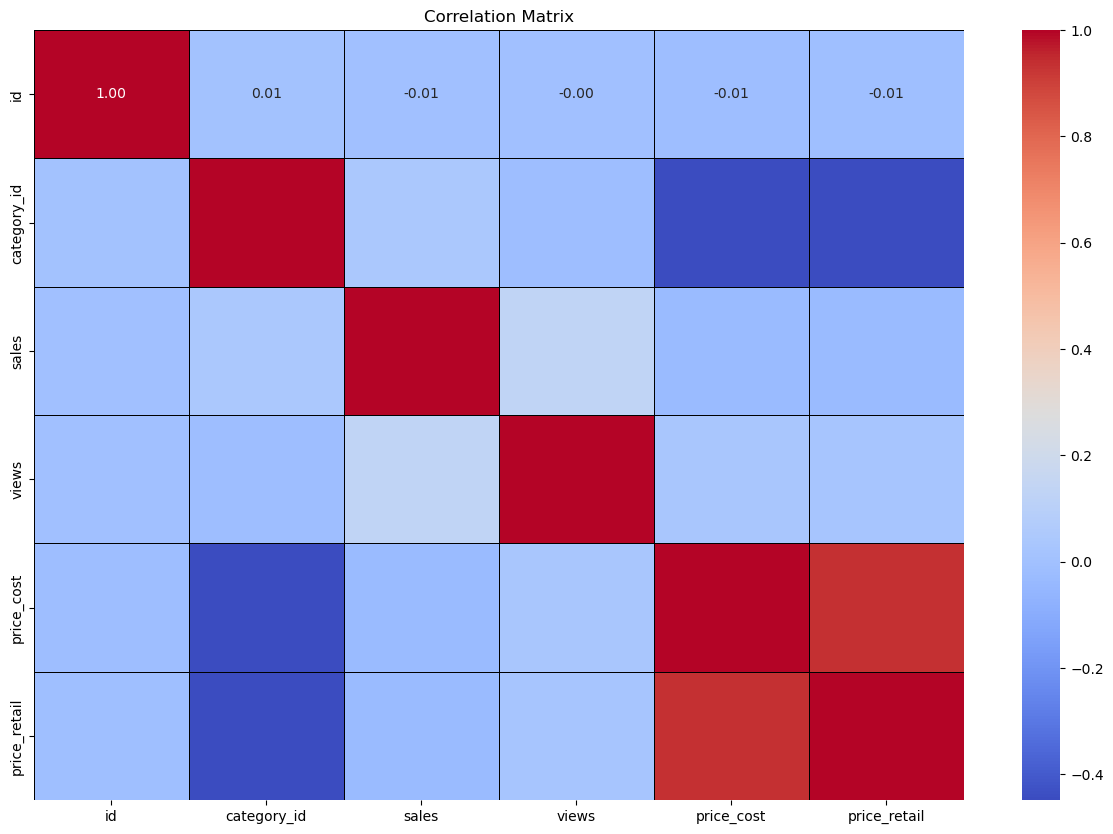

In [60]:
#correlation matrix
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm',  linewidths=0.5, linecolor='black', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [47]:
#generating predicted and residuals
y_pred = model.predict(X)
residuals = y - y_pred

In [44]:
#test of multicollinearity
vif= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
pd.DataFrame(vif, index=df.columns)

,0
id,3.136003
category_id,2.822472
sales,1.025795
views,1.019839
price_cost,11.120762
price_retail,11.213297


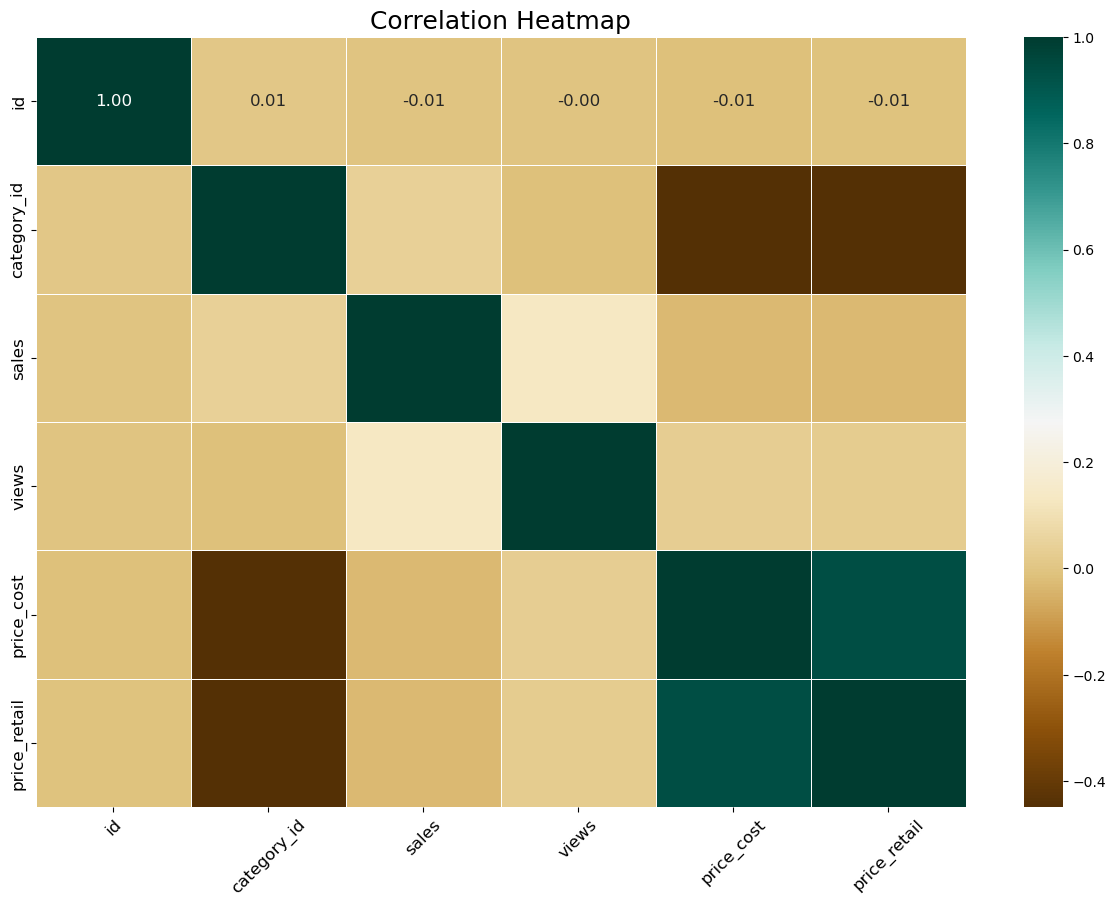

In [58]:
#correlation heat map
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='BrBG', linewidths=.5, annot_kws={"size": 12})
plt.title('Correlation Heatmap')
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()